In [70]:
%matplotlib inline

import random
from collections import Counter

import numpy
import matplotlib.pyplot as plt
import seaborn

from skbio import DNA, TabularMSA, Alignment

ImportError: cannot import name 'Alignment'

In [53]:
READS = [
    "AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA",
    "AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA",
    "AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA",
    "AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA",
    "AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA",
    "AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA",
    "AAGACGTCTAGCTAGCTAGTGCATGCAAGTA",
    "AAGACGTCTAGCTAGCTAGTGCATGCAAGTA",
    "AAGACGTCTAGCTAGCTAGTGCATGCAAGTA",
    "AAGACGTCTAGCTAGCTAGTGCATGCAAGTA",
    "AAGACGTCTAGCTAGCTAGTGCATGCAAGTA",
    "AAGACGTCTAGCTAGCTAGTGCATGCAAGTA",
    "AAGACGCCTATCTAGCTAGTGCATGCAAGTA",
    "AAGACGCCTATCTAGCTAGTGCATGCAAGTA",
    "AAGACGCCTATCTAGCTAGTGCATGCAAGTA",
    "AAGACGCCTATCTAGCTAGTGCATGCAAGTA",
    "AAGACGCCTATCTAGCTAGTGCATGCAAGTA",
    "AAGACGCCTATCTAGCTAGTGCATGCAAGTA",
]

ALPHABET = {'A', 'C', 'T', 'G'}

# Simulate sequencing error
error_rate = 0.15
for i, read in enumerate(READS):
    num_errors = int(round(error_rate * len(read)))
    for pos in random.sample(range(len(read)), num_errors):
        READS[i] = read[:pos] + random.choice(list(ALPHABET - {read[pos]})) + read[pos+1:]
    
    READS[i] = DNA(READS[i])

In [54]:
msa = TabularMSA(READS)

for read in READS:
    print("Current read:", read)
    error_probs = []
    for pos, pile in enumerate(msa.iter_positions()):
        freqs = pile.frequencies(relative=True)
        base = str(read[pos])
        error_prob = (0.25*error_rate) / freqs[base]
        error_probs.append(error_prob)
    
    read.positional_metadata['error_prob'] = error_probs
    print(read.positional_metadata)
        

Current read: AAGGCGTCTAGATAGCTAGTGCATGCTAGTA
    error_prob
0     0.037500
1     0.037500
2     0.039706
3     0.135000
4     0.042188
5     0.037500
6     0.061364
7     0.039706
8     0.042188
9     0.037500
10    0.056250
11    0.675000
12    0.037500
13    0.037500
14    0.039706
15    0.037500
16    0.042188
17    0.037500
18    0.037500
19    0.042188
20    0.037500
21    0.037500
22    0.037500
23    0.037500
24    0.037500
25    0.042188
26    0.096429
27    0.037500
28    0.037500
29    0.037500
30    0.037500
Current read: AAGTCGTCTAGCTAGCTAGTGCATGCTAGTA
    error_prob
0     0.037500
1     0.037500
2     0.039706
3     0.675000
4     0.042188
5     0.037500
6     0.061364
7     0.039706
8     0.042188
9     0.037500
10    0.056250
11    0.039706
12    0.037500
13    0.037500
14    0.039706
15    0.037500
16    0.042188
17    0.037500
18    0.037500
19    0.042188
20    0.037500
21    0.037500
22    0.037500
23    0.037500
24    0.037500
25    0.042188
26    0.096429
27    0.

Counter({6: 10, 89: 5, 94: 4, 11: 3, 67: 2, 39: 2, 28: 2, 61: 2})
Error prob for base A : 0.675
new base: C
{11: 'C'}
Error prob for base T : 0.675
new base: A
{3: 'A'}
Error prob for base G : 0.675
new base: T
{19: 'T'}
Error prob for base G : 0.675
new base: T
{16: 'T'}
Error prob for base C : 0.675
new base: T
{16: 'T'}
Error prob for base T : 0.675
new base: C
{7: 'C'}
Error prob for base C : 0.675
new base: T
{19: 'T'}
Error prob for base A : 0.675
new base: G
{2: 'G'}
Error prob for base A : 0.675
new base: G
{10: 'G'}
Error prob for base T : 0.675
new base: G
{14: 'G'}
New reads:
-----
AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA
AAGACGTCTAGCTAGCTAGTGCATGCTAGTA
AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA
AAGGGGTCTAGCTAGCTAGTGCATGCTAGTA
AAGGCGTCTAGCTAGCTAGTGCATGTTAGTA
AAGGCGCCTAGCTAGCTAGTGCATGCTAGTA
AAGAGGTCTAGCTAGCTAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCTAGTA
AAGACGTCTAGCTAGCTAGTGCATGCAAGTA
AAGACGTCGAGCTAGCTAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCAAGTA
AAGACGCCGATCTAGC

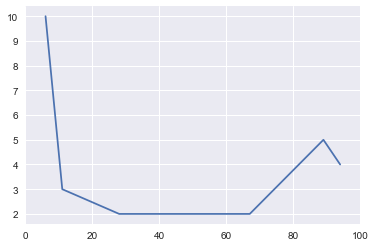

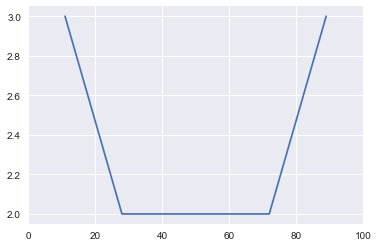

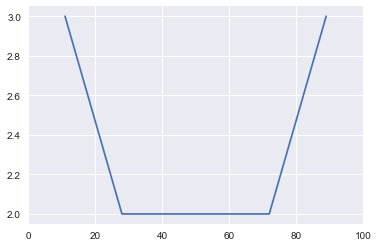

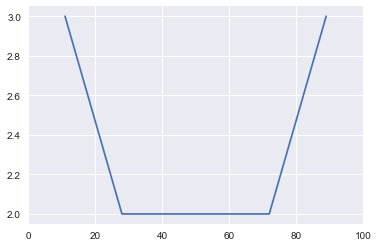

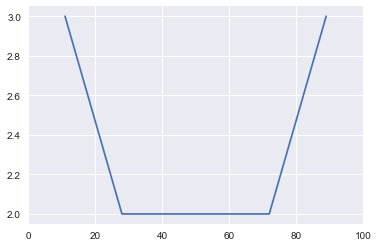

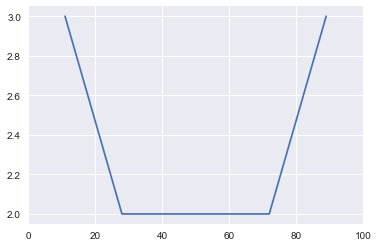

In [69]:
max_iter = 50

def plot_allele_freqs(msa):
    counter = Counter()
    for pile in msa.iter_positions():
        freqs = pile.frequencies(relative=True)
        freqs = {k: int(round(v*100)) for k, v in freqs.items() if v != 1.0}
        counter.update(freqs.values())
        
    print(counter)
    x = []
    y = []
    for k in sorted(counter):
        x.append(k)
        y.append(counter[k])
        
    plt.plot(x, y)
    plt.xlim(0, 100)
    
def build_new_seq(seq, replacements):
    chars = []
    
    for pos, char in enumerate(str(seq)):
        chars.append(replacements[pos] if pos in replacements else char)
        
    metadata = None
    if seq.has_metadata():
        metadata = seq.metadata

    positional_metadata = None
    if seq.has_positional_metadata():
        positional_metadata = seq.positional_metadata

    return seq.__class__("".join(chars), metadata=metadata, 
                        positional_metadata=positional_metadata)
        
    
plt.figure()
plot_allele_freqs(msa)

new_msa = msa
current_reads = READS
for num in range(5):
    new_reads = []
    for read in current_reads:
        replacements = {}
        for pos, pile in enumerate(new_msa.iter_positions()):
            freqs = pile.frequencies(relative=True)
            #print("Freqs:", freqs)
            base = str(read[pos])
            error_prob = (0.25*error_rate) / freqs[base] if base in freqs else 1.0
            read.positional_metadata['error_prob'][pos] = error_prob
            
            if read.positional_metadata['error_prob'][pos] >= 0.5:
                print("Error prob for base", base, ":", read.positional_metadata['error_prob'][pos])
                alphabet = ['A', 'C', 'T', 'G']
                freqs = [freqs.get(k, 0.0) for k in alphabet]
                
                new_base = numpy.random.choice(alphabet, p=freqs)
                print("new base:", new_base)
                replacements[pos] = new_base
        
        if replacements:
            print(replacements)
            new_read = build_new_seq(read, replacements)
            new_reads.append(new_read)
        else:
            new_reads.append(read)
    
    new_msa = TabularMSA(new_reads)
    print("New reads:")
    print("-----")
    for r in new_reads:
        print(r)
        
    current_reads = new_reads
        
    plt.figure()
    plot_allele_freqs(new_msa)
        
                

In [73]:
for orig, new in zip(READS, current_reads):
    print(orig)
    print(new)
    print("".join("=" if oc == nc else "*" for oc, nc in zip(str(orig), str(new))))

AAGGCGTCTAGATAGCTAGTGCATGCTAGTA
AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA
===========*===================
AAGTCGTCTAGCTAGCTAGTGCATGCTAGTA
AAGACGTCTAGCTAGCTAGTGCATGCTAGTA
===*===========================
AAGGCGTCTAGCTAGCTAGGGCATGCTAGTA
AAGGCGTCTAGCTAGCTAGTGCATGCTAGTA
===================*===========
AAGGGGTCTAGCTAGCTAGTGCATGCTAGTA
AAGGGGTCTAGCTAGCTAGTGCATGCTAGTA
AAGGCGTCTAGCTAGCTAGTGCATGTTAGTA
AAGGCGTCTAGCTAGCTAGTGCATGTTAGTA
AAGGCGCCTAGCTAGCTAGTGCATGCTAGTA
AAGGCGCCTAGCTAGCTAGTGCATGCTAGTA
AAGAGGTCTAGCTAGCTAGTGCATGCAAGTA
AAGAGGTCTAGCTAGCTAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCTAGTA
AAGACGTCTAGCTAGCTAGTGCATGCTAGTA
AAGACGTCTAGCTAGCGAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCAAGTA
================*==============
AAGACGTCGAGCTAGCTAGTGCATGCAAGTA
AAGACGTCGAGCTAGCTAGTGCATGCAAGTA
AAGACGTCTAGCTAGCCAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCAAGTA
================*==============
AAGACGTTTAGCTAGCTAGTGCATGCAAGTA
AAGACGTCTAGCTAGCTAGTGCATGCAAGTA
=======*=======================
AAGACGCCGATCTAGCTAGTGCATGCAAGTA
AAGACGCC